# image tracking using optical flow in cv2  8_10_2020


In [1]:
'''
optical flow will first get the frame and the points,  
then it will attempt to track it through frames as object moves...
provided that:
1. intensity stays similar and
2. neighboring pixles have similar motion to the tracked item

optical flow uses Lucas-kanade function. 
It only tracks SPARCE datasets or datasets you tell it to track.


GUNNER FURNBACK will track all of the things in the frame... DENSE Optical Flow
'''

'\noptical flow will first get the frame and the points,  \nthen it will attempt to track it through frames as object moves...\nprovided that:\n1. intensity stays similar and\n2. neighboring pixles have similar motion to the tracked item\n'

In [2]:
# First we will use corner detection and points from there as an anchor to track. 
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 


In [3]:
corner_track_params = dict(maxCorners = 10,qualityLevel = 0.3,minDistance = 7, blockSize = 7)

#lk params is for Lucas Kanade:  Window size (big/small) is a tradeoff
# large window will catch smaller movements, smaller window will miss it...
# large window may not be senitive to small movement, where small movement can be huge for small window
lk_params = dict(winSize = (200,200),maxLevel = 2,criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# max level = the image is in a pyramid structure from level 0 through level 4 based on abstraction layer and resolution 


TypeError: unhashable type: 'numpy.ndarray'

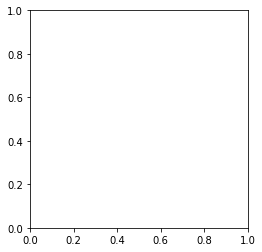

In [10]:
cap = cv2.VideoCapture(0)   #0 for my camera or use some other video file...
ret, prev_frame = cap.read()    # the very first frame is treated as PREV 

prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# now deciding and assigning which points to track  PTS.   Top 10 from maxCorners and track them
'''
goodFeaturesToTrack() 
It finds N strongest corners in the image by Shi-Tomasi method(or Harris Corner Detection,  
if you specify it).   As usual,  image should be a grayscale image.   
Then you specifynumber of corners you want to find. Then you specify the quality level, 
which is a value between 0-1, which denotesthe minimum quality of corner below which everyone is rejected.  
Then we provide the minimum euclidean distancebetween corners detected

With all these informations, the function finds corners in the image. 
All corners below quality level are rejected. 
Thenit sorts the remaining corners based on quality in the descending order.  
Then function takes first strongest corner,
throws away all the nearby corners in the range of minimum distance and returns N strongest corners.
'''
prevPts = cv2.goodFeaturesToTrack(prev_gray,mask = None, **corner_track_params)
mask = np.zeros_like(prev_frame)

while True: 
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #now calculates the optical flow
    
    nextPts,status, err = cv2.calcOpticalFlowPyrLK(prev_gray, frame_gray,prevPts,None, **lk_params )
    
    # the opticalFlow returns 'status' or an array.
    
    good_new = nextPts[status ==1]     ## if the flow has been found it is '1' else '0'
    good_prev = prevPts[status ==1]
    
    for i, (new, prev) in enumerate(zip(good_new, good_prev)):
        x_new, y_new = new.ravel()  # this is to flatten out the array...
        x_prev,y_prev =prev.ravel()
        
        #draw line
        mask = cv2.line(mask, (x_new, y_new),(x_prev,y_prev),(0,255,0),3)
        #draw circle
        frame = cv2.circle(frame, (x_new,y_new),8,(0,0,255),-1)
        
        img = cv2.add(frame, mask)
        plt.imshow('tracking',img)
        
        k = cv2.waitKey(30) & 0xFF
        
        if k ==27:
            break
            
        prev_gray = frame_gray.copy()    # resetting
        prevPts = good_new.reshape(-1,1,2)
        
cv2.destroyAllWindows()
cap.release()
        
        
        
        
        
        
    

In [11]:
cap.release()
